In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('ai_job_trends_dataset.csv')

Saving ai_job_trends_dataset.csv to ai_job_trends_dataset.csv


In [2]:
# Aperçu rapide
print("Dimensions :", df.shape)
display(df.head(5))


Dimensions : (30000, 13)


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [3]:
# Types de données et valeurs manquantes
df.info()

# Statistiques de base
display(df.describe(include="all").T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Job Title,30000,639,"Surveyor, insurance",75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,30000,8,Entertainment,3895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Status,30000,2,Increasing,15136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AI Impact Level,30000,3,Moderate,10042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Median Salary (USD),30000.0,NaN,NaN,NaN,90119.965639,34412.013953,30001.86,60500.7025,90274.115,119454.71,149998.5
Required Education,30000,5,Bachelor’s Degree,6146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Experience Required (Years),30000.0,NaN,NaN,NaN,10.051433,6.060678,0.0,5.0,10.0,15.0,20.0
Job Openings (2024),30000.0,NaN,NaN,NaN,5039.640833,2861.009654,100.0,2570.0,5034.0,7527.0,10000.0
Projected Openings (2030),30000.0,NaN,NaN,NaN,5074.2181,2866.550722,100.0,2586.75,5106.5,7573.0,10000.0
Remote Work Ratio (%),30000.0,NaN,NaN,NaN,49.836431,28.966688,0.0,24.57,49.57,75.1,100.0


In [4]:
# Standardiser les noms de colonnes
df.columns = [c.strip().replace(" ", "_").replace("(", "").replace(")", "") for c in df.columns]

print("=== INFORMATIONS SUR LE DATASET ===")
print(f"Dimensions : {df.shape}")
print(f"Colonnes : {df.columns.tolist()}")
print(f"Pays uniques : {df['Location'].unique()}")
print(f"Métiers uniques : {df['Job_Title'].nunique()}")

=== INFORMATIONS SUR LE DATASET ===
Dimensions : (30000, 13)
Colonnes : ['Job_Title', 'Industry', 'Job_Status', 'AI_Impact_Level', 'Median_Salary_USD', 'Required_Education', 'Experience_Required_Years', 'Job_Openings_2024', 'Projected_Openings_2030', 'Remote_Work_Ratio_%', 'Automation_Risk_%', 'Location', 'Gender_Diversity_%']
Pays uniques : ['UK' 'USA' 'Canada' 'Australia' 'Germany' 'China' 'India' 'Brazil']
Métiers uniques : 639


In [6]:
# Calcul du taux de croissance avec gestion des divisions par zéro
def safe_growth_rate(row):
    if row['Job_Openings_2024'] == 0:
        return 0  # Éviter la division par zéro
    return ((row['Projected_Openings_2030'] - row['Job_Openings_2024']) /
            row['Job_Openings_2024']) * 100

df['Growth_Rate'] = df.apply(safe_growth_rate, axis=1)
# Vérification des valeurs extrêmes
print(f"Taux de croissance - Min: {df['Growth_Rate'].min():.2f}%, Max: {df['Growth_Rate'].max():.2f}%")
print(f"Valeurs NaN dans Growth_Rate: {df['Growth_Rate'].isna().sum()}")
print(f"Valeurs infinies: {np.isinf(df['Growth_Rate']).sum()}")

# Nettoyage des valeurs extrêmes
df['Growth_Rate'] = df['Growth_Rate'].replace([np.inf, -np.inf], np.nan).fillna(0)

Taux de croissance - Min: -98.94%, Max: 8945.10%
Valeurs NaN dans Growth_Rate: 0
Valeurs infinies: 0


In [9]:
print("\n=== PRÉPARATION DE LA MATRICE POUR CAH ===")

# Créer un tableau croisé : pays × métiers avec le taux de croissance moyen
pivot_df = df.pivot_table(
    values='Growth_Rate',
    index='Location',
    columns='Job_Title',
    aggfunc='mean'
).fillna(0)

print(f"Dimensions de la matrice pivot : {pivot_df.shape}")
print(f"Pays analysés : {pivot_df.index.tolist()}")
# Vérification de la densité des données
non_zero_elements = (pivot_df != 0).sum().sum()
total_elements = pivot_df.shape[0] * pivot_df.shape[1]
print(f"Densité de la matrice : {non_zero_elements/total_elements:.2%}")



=== PRÉPARATION DE LA MATRICE POUR CAH ===
Dimensions de la matrice pivot : (8, 639)
Pays analysés : ['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'India', 'UK', 'USA']
Densité de la matrice : 99.77%


In [11]:


scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot_df)

print(f"\nDonnées standardisées - Moyenne: {pivot_scaled.mean():.3f}, Écart-type: {pivot_scaled.std():.3f}")




Données standardisées - Moyenne: -0.000, Écart-type: 1.000


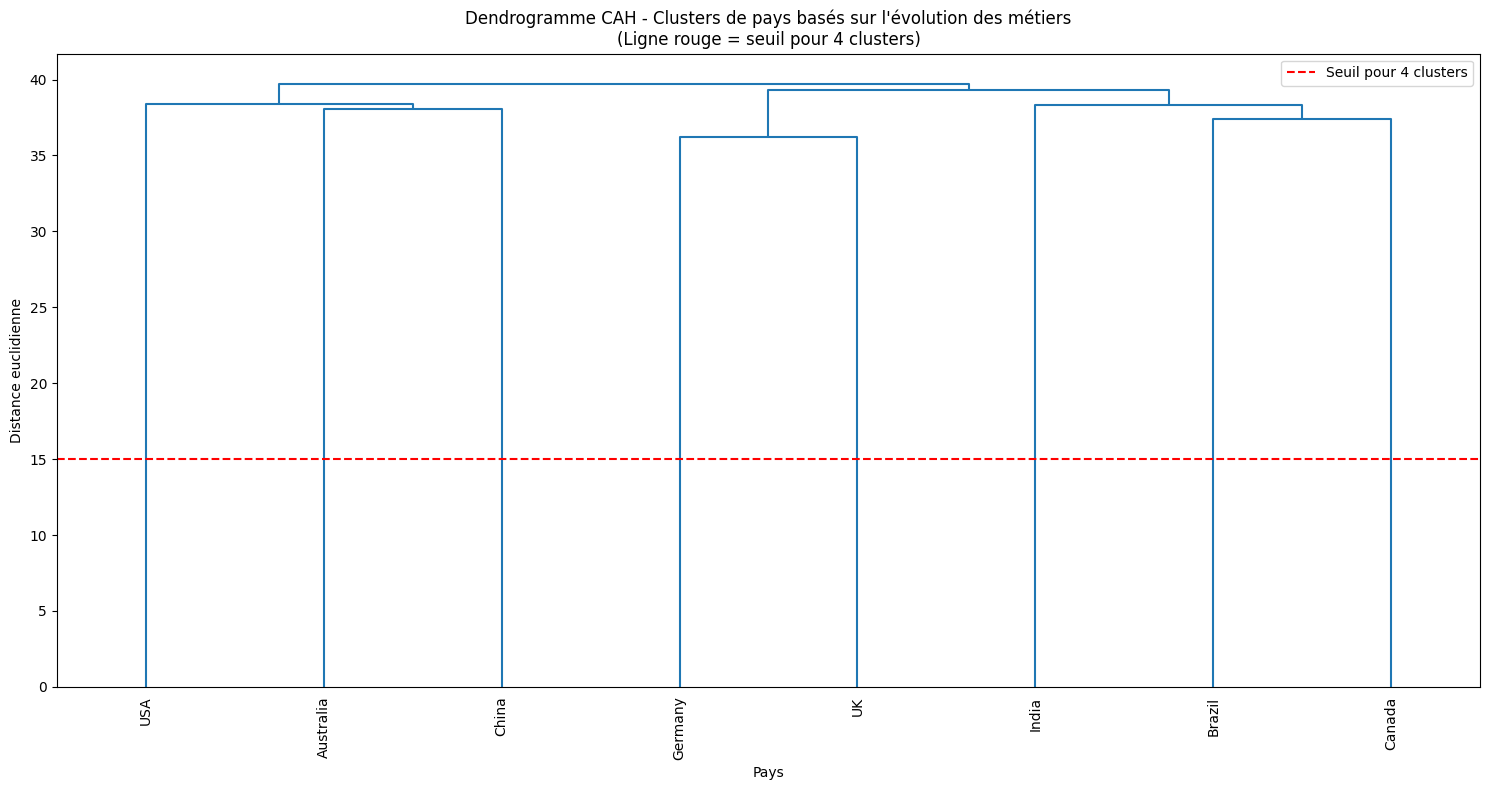

In [12]:
# Méthode 1: CAH avec scipy (pour le dendrogramme)
Z = linkage(pivot_scaled, method='ward', metric='euclidean')

# Visualisation du dendrogramme pour choisir le nombre de clusters
plt.figure(figsize=(15, 8))
plt.title('Dendrogramme CAH - Clusters de pays basés sur l\'évolution des métiers\n(Ligne rouge = seuil pour 4 clusters)')
dendrogram(Z,
          labels=pivot_df.index.tolist(),
          leaf_rotation=90,
          leaf_font_size=10,
          color_threshold=15)
plt.axhline(y=15, color='r', linestyle='--', label='Seuil pour 4 clusters')
plt.ylabel('Distance euclidienne')
plt.xlabel('Pays')
plt.legend()
plt.tight_layout()
plt.show()

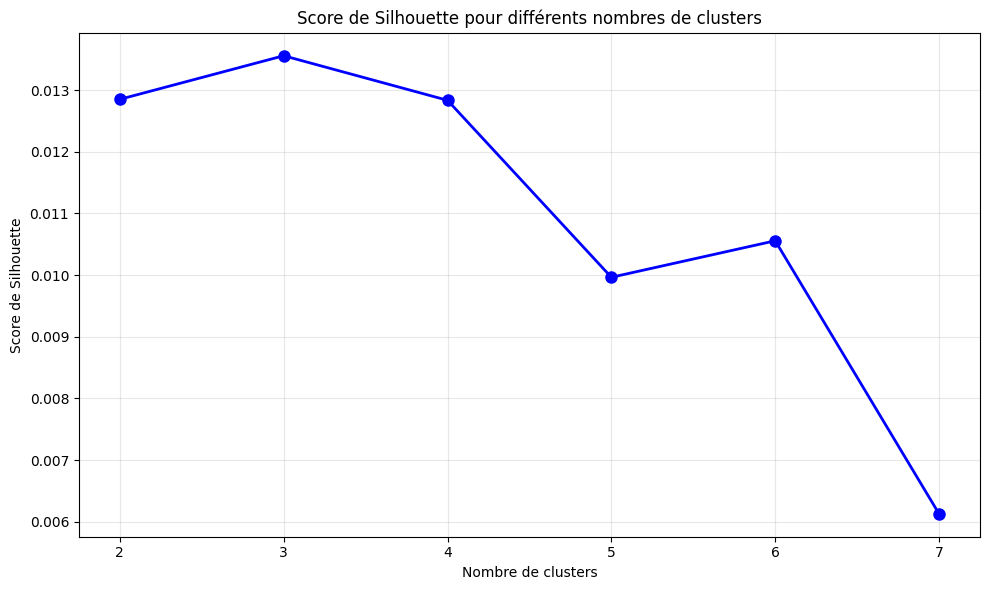

In [14]:
# Calcul du score de silhouette pour différents nombres de clusters
silhouette_scores = []
cluster_range = range(2, min(8, len(pivot_df)))  # Éviter plus de clusters que de pays

for n_clusters in cluster_range:
    # Méthode 2: CAH avec scikit-learn (plus moderne)
    hc = AgglomerativeClustering(
        n_clusters=n_clusters,
        metric='euclidean',
        linkage='ward'
    )
    cluster_labels = hc.fit_predict(pivot_scaled)

    if len(set(cluster_labels)) > 1:  # Éviter erreur si un seul cluster
        score = silhouette_score(pivot_scaled, cluster_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)

# Visualisation des scores de silhouette
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.title('Score de Silhouette pour différents nombres de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Silhouette')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [15]:
# Choix du nombre optimal de clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Nombre optimal de clusters (selon silhouette) : {optimal_clusters}")

# Utilisation du nombre optimal ou d'une valeur fixe selon le contexte
num_clusters = optimal_clusters  # Vous pouvez aussi utiliser une valeur fixe comme 4


Nombre optimal de clusters (selon silhouette) : 3


In [16]:
# Application de la CAH avec le nombre choisi de clusters
hc_final = AgglomerativeClustering(
    n_clusters=num_clusters,
    metric='euclidean',
    linkage='ward'
)
clusters = hc_final.fit_predict(pivot_scaled)

# Ajouter les clusters au DataFrame
pivot_df['Cluster'] = clusters

print(f"\n=== RÉPARTITION DES PAYS PAR CLUSTER ===")
for cluster_num in range(num_clusters):
    countries_in_cluster = pivot_df[pivot_df['Cluster'] == cluster_num].index.tolist()
    print(f"Cluster {cluster_num}: {countries_in_cluster}")



=== RÉPARTITION DES PAYS PAR CLUSTER ===
Cluster 0: ['Australia', 'China', 'USA']
Cluster 1: ['Brazil', 'Canada', 'India']
Cluster 2: ['Germany', 'UK']


In [17]:
# 7. APPLICATION FINALE DE LA CAH
# =============================================================================

# Application de la CAH avec le nombre choisi de clusters
hc_final = AgglomerativeClustering(
    n_clusters=num_clusters,
    metric='euclidean',
    linkage='ward'
)
clusters = hc_final.fit_predict(pivot_scaled)

# Ajouter les clusters au DataFrame
pivot_df['Cluster'] = clusters

print(f"\n=== RÉPARTITION DES PAYS PAR CLUSTER ===")
for cluster_num in range(num_clusters):
    countries_in_cluster = pivot_df[pivot_df['Cluster'] == cluster_num].index.tolist()
    print(f"Cluster {cluster_num}: {countries_in_cluster}")

# =============================================================================
# 8. ANALYSE DES CLUSTERS
# =============================================================================

def analyze_cluster_variations(cluster_data, cluster_num):
    """Analyse détaillée d'un cluster"""
    cluster_means = cluster_data.mean()

    # Métiers en forte augmentation (top 5)
    top_increase = cluster_means.nlargest(5)

    # Métiers en forte diminution (top 5)
    top_decrease = cluster_means.nsmallest(5)

    print(f"\n=== CLUSTER {cluster_num} ===")
    print(f"Pays: {', '.join(cluster_data.index.tolist())}")
    print(f"Taux de croissance moyen: {cluster_means.mean():.1f}%")

    print("\n📈 Métiers en FORTE AUGMENTATION:")
    for job, rate in top_increase.items():
        print(f"   • {job}: {rate:+.1f}%")

    print("\n📉 Métiers en FORTE DIMINUTION:")
    for job, rate in top_decrease.items():
        print(f"   • {job}: {rate:+.1f}%")

    return top_increase, top_decrease

# Analyse de chaque cluster
print("\n" + "="*60)
print("ANALYSE DÉTAILLÉE DES CLUSTERS")
print("="*60)

for cluster_num in range(num_clusters):
    cluster_jobs = pivot_df[pivot_df['Cluster'] == cluster_num].drop('Cluster', axis=1)
    analyze_cluster_variations(cluster_jobs, cluster_num)


=== RÉPARTITION DES PAYS PAR CLUSTER ===
Cluster 0: ['Australia', 'China', 'USA']
Cluster 1: ['Brazil', 'Canada', 'India']
Cluster 2: ['Germany', 'UK']

ANALYSE DÉTAILLÉE DES CLUSTERS

=== CLUSTER 0 ===
Pays: Australia, China, USA
Taux de croissance moyen: 145.3%

📈 Métiers en FORTE AUGMENTATION:
   • Corporate investment banker: +930.6%
   • Fast food restaurant manager: +836.9%
   • Midwife: +833.2%
   • Scientist, research (life sciences): +830.3%
   • Radiographer, therapeutic: +825.2%

📉 Métiers en FORTE DIMINUTION:
   • Marketing executive: -36.1%
   • Ship broker: -35.3%
   • Dietitian: -34.1%
   • Licensed conveyancer: -32.2%
   • Engineer, energy: -30.6%

=== CLUSTER 1 ===
Pays: Brazil, Canada, India
Taux de croissance moyen: 142.9%

📈 Métiers en FORTE AUGMENTATION:
   • Jewellery designer: +1289.2%
   • Ship broker: +978.4%
   • Legal executive: +741.8%
   • Librarian, public: +685.1%
   • Engineer, broadcasting (operations): +662.2%

📉 Métiers en FORTE DIMINUTION:
   • Nurs


=== VISUALISATION DES CLUSTERS (PCA) ===


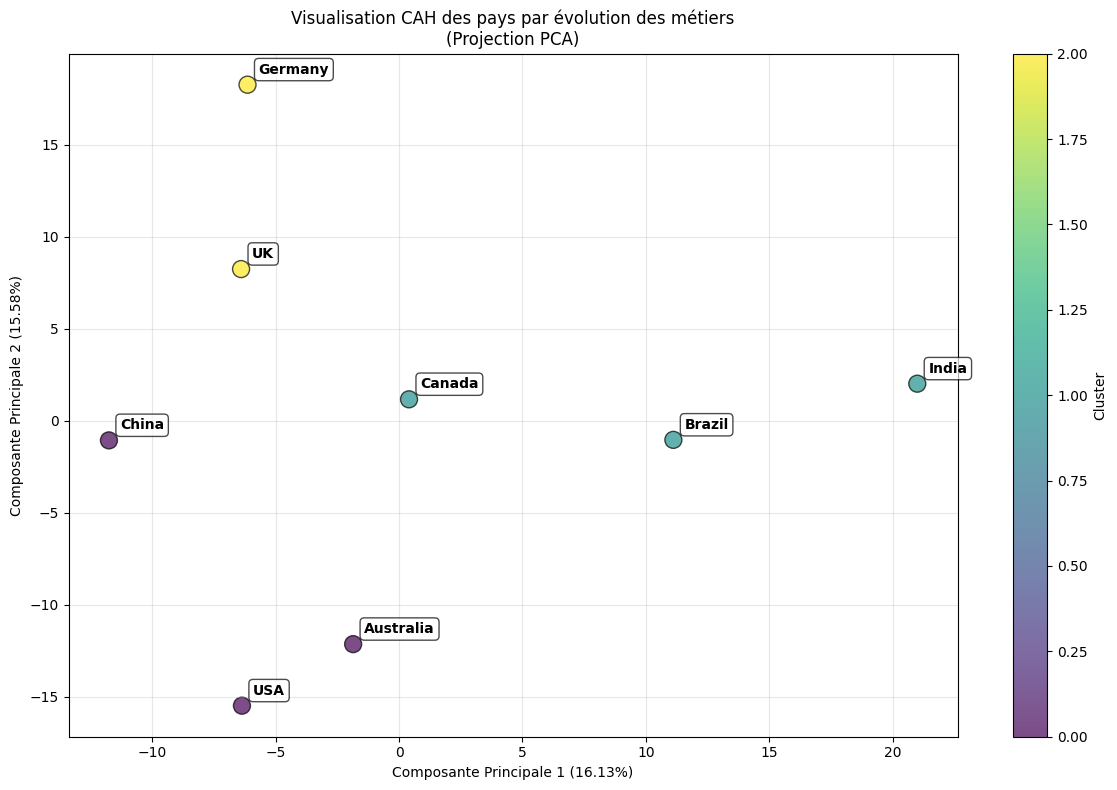

In [19]:
from sklearn.decomposition import PCA

print("\n=== VISUALISATION DES CLUSTERS (PCA) ===")

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
pivot_pca = pca.fit_transform(pivot_scaled)

# Créer un DataFrame pour la visualisation
pca_df = pd.DataFrame({
    'PC1': pivot_pca[:, 0],
    'PC2': pivot_pca[:, 1],
    'Cluster': clusters,
    'Country': pivot_df.index
})

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'],
                     cmap='viridis', s=150, alpha=0.7, edgecolors='black')
# Ajouter les labels des pays
for i, country in enumerate(pca_df['Country']):
    plt.annotate(country, (pca_df['PC1'][i], pca_df['PC2'][i]),
                xytext=(8, 8), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))

plt.colorbar(scatter, label='Cluster')
plt.title('Visualisation CAH des pays par évolution des métiers\n(Projection PCA)')
plt.xlabel(f'Composante Principale 1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Composante Principale 2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:

print("\n" + "="*60)
print("SYNTHÈSE FINALE DE L'ANALYSE CAH")
print("="*60)

# Calcul des statistiques globales
cluster_stats = []
for cluster_num in range(num_clusters):
    cluster_data = pivot_df[pivot_df['Cluster'] == cluster_num].drop('Cluster', axis=1)
    countries = cluster_data.index.tolist()
    mean_growth = cluster_data.values.mean()
    std_growth = cluster_data.values.std()

    cluster_stats.append({
        'Cluster': cluster_num,
        'Pays': countries,
        'Croissance Moyenne': mean_growth,
        'Variabilité': std_growth
    })

# Tri par croissance moyenne
cluster_stats_sorted = sorted(cluster_stats, key=lambda x: x['Croissance Moyenne'], reverse=True)

print("\n🏆 CLASSEMENT DES CLUSTERS PAR CROISSANCE MOYENNE:")
for i, stats in enumerate(cluster_stats_sorted, 1):
    print(f"\n{i}. Cluster {stats['Cluster']}:")
    print(f"   Pays: {', '.join(stats['Pays'])}")
    print(f"   Croissance moyenne: {stats['Croissance Moyenne']:+.1f}%")
    print(f"   Variabilité: {stats['Variabilité']:.1f}%")

# Identification des tendances globales
most_growth_cluster = cluster_stats_sorted[0]
least_growth_cluster = cluster_stats_sorted[-1]

print(f"\n💡 CONCLUSIONS STRATÉGIQUES:")
print(f"• Le cluster le plus dynamique est le Cluster {most_growth_cluster['Cluster']} "
      f"({most_growth_cluster['Croissance Moyenne']:+.1f}%)")
print(f"• Le cluster le plus en difficulté est le Cluster {least_growth_cluster['Cluster']} "
      f"({least_growth_cluster['Croissance Moyenne']:+.1f}%)")
print(f"• Score de silhouette moyen: {silhouette_score(pivot_scaled, clusters):.3f}")

print(f"\n✅ ANALYSE TERMINÉE AVEC SUCCÈS!")
print(f"• {len(pivot_df)} pays analysés")
print(f"• {pivot_df.shape[1]-1} métiers considérés")
print(f"• {num_clusters} clusters identifiés")



SYNTHÈSE FINALE DE L'ANALYSE CAH

🏆 CLASSEMENT DES CLUSTERS PAR CROISSANCE MOYENNE:

1. Cluster 0:
   Pays: Australia, China, USA
   Croissance moyenne: +145.3%
   Variabilité: 253.9%

2. Cluster 1:
   Pays: Brazil, Canada, India
   Croissance moyenne: +142.9%
   Variabilité: 248.9%

3. Cluster 2:
   Pays: Germany, UK
   Croissance moyenne: +124.4%
   Variabilité: 213.4%

💡 CONCLUSIONS STRATÉGIQUES:
• Le cluster le plus dynamique est le Cluster 0 (+145.3%)
• Le cluster le plus en difficulté est le Cluster 2 (+124.4%)
• Score de silhouette moyen: 0.014

✅ ANALYSE TERMINÉE AVEC SUCCÈS!
• 8 pays analysés
• 639 métiers considérés
• 3 clusters identifiés
